PART A Q1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\achin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data = pd.read_csv(r'D:\OneDrive\Desktop\spam.csv',encoding='latin-1')

In [7]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [9]:
data['label'] = data.label.map({'ham':0, 'spam':1})

In [10]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [15]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0].values

In [16]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0].values

In [17]:
print(cv.get_feature_names()[0:20])
print(cv.get_feature_names()[-20:])

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [18]:
print(X.shape,y.shape)

(5572, 6221) (5572,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
print(X_train.shape,X_test.shape)

(4457, 6221) (1115, 6221)


In [21]:
prediction = dict()
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [22]:
prediction["MultinomialNB"] = classifier.predict(X_test)
accuracy_score(y_test,prediction["MultinomialNB"])

0.979372197309417

In [23]:
conf_mat = confusion_matrix(y_test, prediction['MultinomialNB'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5, 15.0, 'Predicted label')

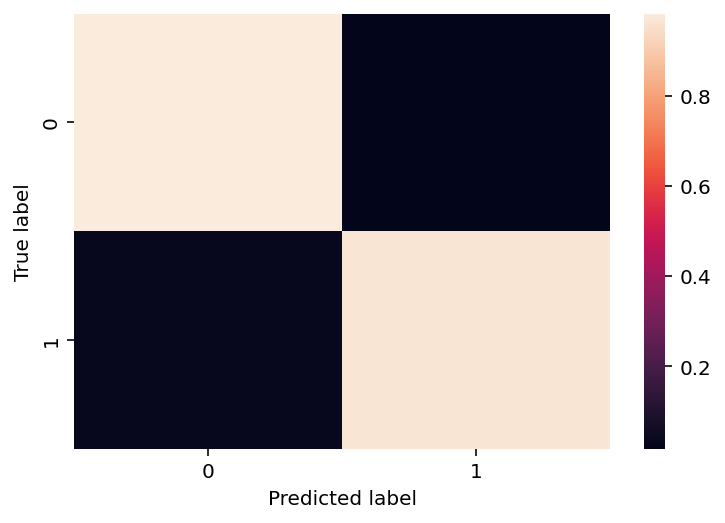

In [24]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [25]:
print(conf_mat)

[[932  17]
 [  6 160]]


In [26]:
from sklearn.metrics import recall_score,precision_score
recall_score(y_test, prediction['MultinomialNB'])

0.963855421686747

In [27]:
precision_score(y_test, prediction['MultinomialNB'])

0.903954802259887

PART A Q2

In [28]:
from nltk.corpus import treebank

In [29]:
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [30]:
# split data into training and validation set in the ratio 80:20
train_set,test_set =train_test_split(nltk_data,test_size=0.20,random_state = 23)

In [31]:
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print(len(train_tagged_words))
print(len(test_tagged_words))

80605
20071


In [32]:
tags = {tag for word,tag in train_tagged_words}
print(len(tags))
print(tags)
 
# check total words in vocabulary
vocab = {word for word,tag in train_tagged_words}

12
{'X', 'VERB', 'CONJ', '.', 'ADJ', 'ADP', 'ADV', 'DET', 'PRON', 'PRT', 'NOUN', 'NUM'}


In [33]:
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)#total number of times the passed tag occurred in train_bag
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
#now calculate the total number of times the passed word occurred as the passed tag.
    count_w_given_tag = len(w_given_tag_list)
 
     
    return (count_w_given_tag, count_tag)

In [34]:
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

# creating t x t transition matrix of tags, t= no of tags
# Matrix(i, j) represents P(jth tag after the ith tag)
 
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
 
print(tags_matrix)

[[7.53193125e-02 2.06235915e-01 1.05184074e-02 1.58527419e-01
  1.80315543e-02 1.43501133e-01 2.68595032e-02 5.61607815e-02
  5.54094650e-02 1.83508635e-01 6.34860992e-02 2.44177319e-03]
 [2.19469681e-01 1.68547571e-01 5.78034669e-03 3.52325886e-02
  6.39508218e-02 9.09257755e-02 8.24846327e-02 1.33681983e-01
  3.62418555e-02 3.17460336e-02 1.10193595e-01 2.17451137e-02]
 [8.84466525e-03 1.52570486e-01 5.52791578e-04 3.53786610e-02
  1.17744610e-01 5.63847423e-02 5.63847423e-02 1.19402982e-01
  5.97014911e-02 6.08070754e-03 3.44941944e-01 4.20121625e-02]
 [2.79179644e-02 8.93374830e-02 5.64801879e-02 9.24514085e-02
  4.60646413e-02 9.09481347e-02 5.21851182e-02 1.75561041e-01
  6.82916343e-02 2.46966607e-03 2.18726516e-01 7.94588178e-02]
 [2.24258974e-02 1.15054604e-02 1.59906391e-02 6.45475835e-02
  6.72776923e-02 7.66380653e-02 4.87519521e-03 5.65522630e-03
  3.90015601e-04 1.15054604e-02 6.98517919e-01 2.06708275e-02]
 [3.51790711e-02 7.87401572e-03 8.89001763e-04 3.91160771e-02
  1

In [35]:
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df)

,X,VERB,CONJ,.,ADJ,ADP,ADV,DET,PRON,PRT,NOUN,NUM
X,0.075319,0.206236,0.010518,0.158527,0.018032,0.143501,0.026860,0.056161,0.055409,0.183509,0.063486,0.002442
VERB,0.219470,0.168548,0.005780,0.035233,0.063951,0.090926,0.082485,0.133682,0.036242,0.031746,0.110194,0.021745
CONJ,0.008845,0.152570,0.000553,0.035379,0.117745,0.056385,0.056385,0.119403,0.059701,0.006081,0.344942,0.042012
.,0.027918,0.089337,0.056480,0.092451,0.046065,0.090948,0.052185,0.175561,0.068292,0.002470,0.218727,0.079459
ADJ,0.022426,0.011505,0.015991,0.064548,0.067278,0.076638,0.004875,0.005655,0.000390,0.011505,0.698518,0.020671
ADP,0.035179,0.007874,0.000889,0.039116,0.107061,0.017399,0.012573,0.324486,0.069469,0.001397,0.321184,0.063373
ADV,0.023566,0.344069,0.006284,0.137078,0.126473,0.119010,0.082482,0.062451,0.016889,0.014925,0.032993,0.033778
DET,0.045773,0.040481,0.000572,0.017165,0.204692,0.009298,0.012015,0.004720,0.003576,0.000286,0.639966,0.021456
PRON,0.092535,0.486366,0.005364,0.039338,0.072418,0.021010,0.036656,0.010282,0.008941,0.012964,0.207421,0.006705
PRT,0.011855,0.391969,0.002677,0.043977,0.085277,0.020268,0.009943,0.106310,0.017973,0.001912,0.250860,0.056979


In [36]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
     
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                 
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
             
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [ ]:
tagged_seq = Viterbi(test_tagged_words)
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm Accuracy: ',accuracy*100)

In [ ]:
tagged_seq[3][1]

In [ ]:
y_test1=[]
y_pred1=[]
for i in range(0,len(tagged_seq)):
    y_pred1.append(tagged_seq[i][1])
    
for i in range(0,len(test_run_base)):
    y_test1.append(test_run_base[i][1])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_test1=le.fit_transform(y_test1)
y_pred1=le.transform(y_pred1)

In [ ]:
accuracy_score(y_test1, y_pred1)

In [ ]:
recall = recall_score(y_test1, y_pred1,pos_label='positive',average='micro')
print("Recall Score : ",recall)

In [ ]:
precision = precision_score(y_test1, y_pred1,pos_label='positive',average='micro')
print("Recall Score : ",precision)

In [ ]:
conf_mat = confusion_matrix(y_test1, y_pred1)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

In [ ]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
print(conf_mat)

In [ ]:
print(classification_report(y_test1, y_pred1))